# Exploring Trees in New York City

Performing an exploratory analysis of your data is an invaluable process that allows any data scientist to both get her hands dirty with data and also gain a more detailed understanding of what kind of data she's working with. New York City Open Data is an excellent resource for large, mostly clean datasets, so let's take a look at a dataset from the 2015 Tree Census, organized by NYC Parks & Recreation. First, we'll import necessary libraries and read in the dataset.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd

In [2]:
df = pd.read_csv('trees.csv')
df = df.dropna()
print(f'Rows and Columns: {df.shape}')
df.columns

Rows and Columns: (642961, 45)


Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [3]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


We can see right away that the data has an abundance of features, most of which, while surely interesting, are beyond the scope of our initial exploratory analysis. Let's go ahead and drop the majority of these columns. This will speed things up and make it easier to work with the features we have left.

In [4]:
df = df.drop(['created_at', 'stump_diam', 'curb_loc', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'community board', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'council district',
       'census tract', 'bin', 'bbl'], axis=1)
df.head()

,tree_id,block_id,tree_dbh,status,health,spc_latin,spc_common,postcode,zip_city,borocode,borough,latitude,longitude,x_sp,y_sp
0,180683,348711,3,Alive,Fair,Acer rubrum,red maple,11375,Forest Hills,4,Queens,40.723092,-73.844215,1027431.148,202756.7687
1,200540,315986,21,Alive,Fair,Quercus palustris,pin oak,11357,Whitestone,4,Queens,40.794111,-73.818679,1034455.701,228644.8374
2,204026,218365,3,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,11211,Brooklyn,3,Brooklyn,40.717581,-73.936608,1001822.831,200716.8913
3,204337,217969,10,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,11211,Brooklyn,3,Brooklyn,40.713537,-73.934456,1002420.358,199244.2531
4,189565,223043,21,Alive,Good,Tilia americana,American linden,11215,Brooklyn,3,Brooklyn,40.666778,-73.975979,990913.775,182202.4260


## Plotting Health by Borough

Much better! Now, let's zero in on the 'health' column. We see that this column has three different values: 'Fair', 'Good' and 'Poor'. One thing we might be interested in is the breakdown between these three statuses in each of the city's five boroughs. 

To see this, we'll group our dataframe by 'health', then grab the value counts for each borough and convert them into a dataframe of their own.

In [54]:
health_count_list = df.groupby('health')['borough'].value_counts().to_list()
boro_list = ['Queens', 'Brooklyn', 'Staten Island', 'Manhattan', 'Bronx']
healthframe = pd.DataFrame({'Fair': health_count_list[:5], 
                   'Good': health_count_list[5:10], 
                   'Poor': health_count_list[10:],
                   })
healthframe = healthframe.set_index(pd.Series(boro_list))
healthframe

,Fair,Good,Poor
Queens,33948,191170,9225
Brooklyn,24876,137389,6416
Staten Island,14318,81808,4175
Manhattan,11107,65538,3503
Bronx,10695,45769,3024


Now that we have our breakdown in a nice tidy dataframe, let's plot it so we can better visualize it.

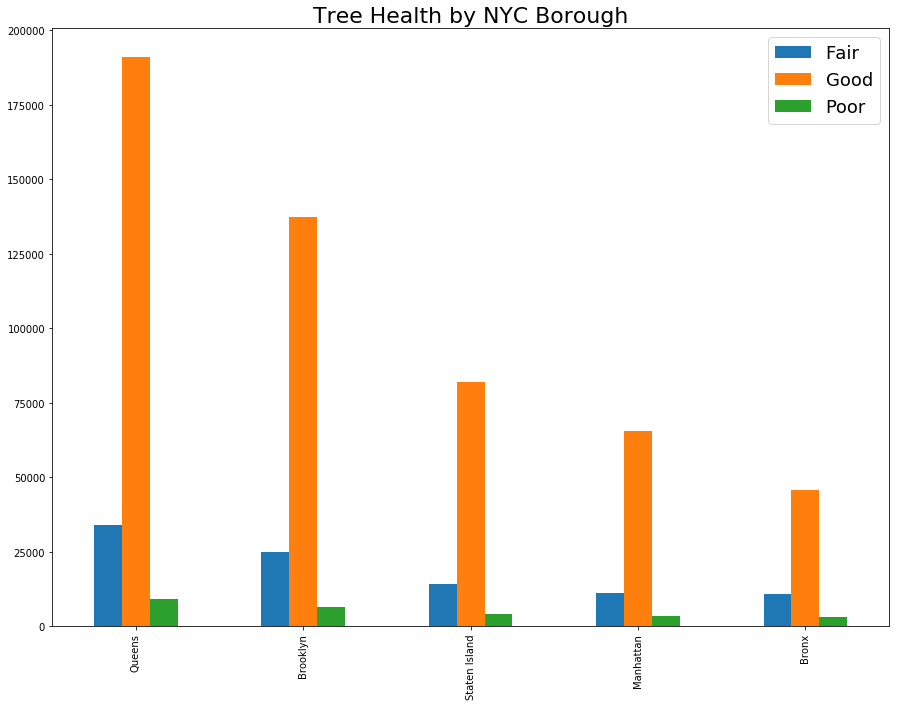

In [6]:
rcParams['figure.figsize'] = 30, 30
healthframe.plot(kind = 'bar', figsize = (15, 11))
plt.legend(fontsize = 18)
plt.title('Tree Health by NYC Borough', fontsize = 22)
plt.savefig('Tree_Health_By_Borough.png')
plt.show()

This is helpful to see, but there's a potential for misleading conclusions. We may be tempted to think that more of the trees in Queens have a 'good' status than the trees in, say, the Bronx. While this is true, it's not that useful because Queens has so many more trees in the first place. We may be more interested in the proportion of each health status in the population of trees for each borough. We can plot this as well.

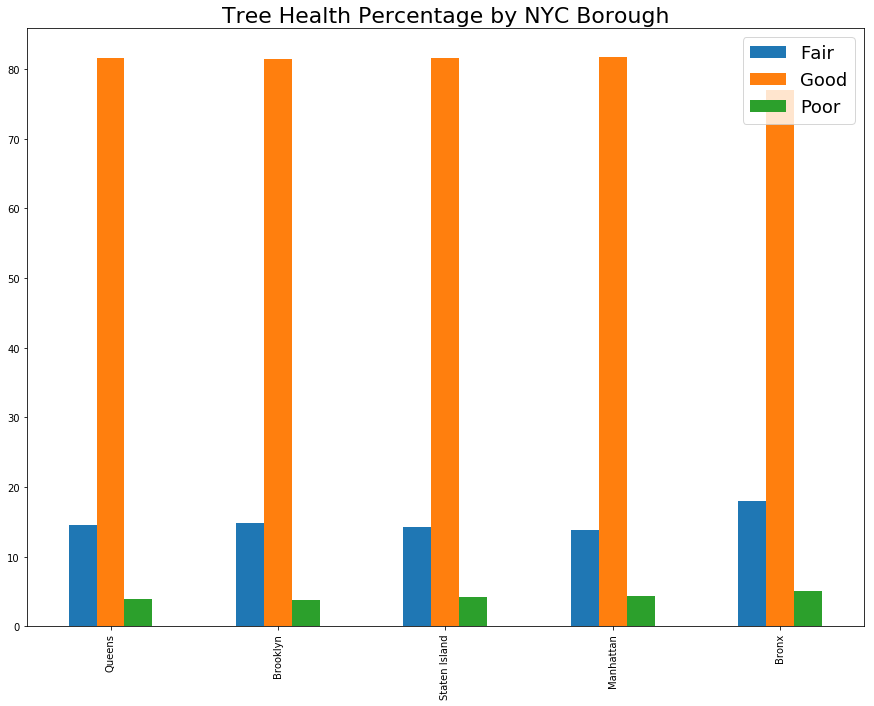

In [62]:
# Converting our health dataframe to one with percentage values
percentframe = pd.DataFrame(
    [[(healthframe.loc[boro,s]/healthframe.loc[boro].sum())*100 for s in healthframe.columns] for boro in boro_list], 
    columns = ['Fair', 'Good', 'Poor'])
percentframe = percentframe.set_index(pd.Series(boro_list))
# Plotting our new dataframe
percentframe.plot(kind = 'bar', figsize = (15, 11))
plt.legend(fontsize = 18)
plt.title('Tree Health Percentage by NYC Borough', fontsize = 22)
plt.savefig('Tree_Health_Percentage_By_Borough.png')
plt.show()

This is a helpful visualization, as it communicates that the proportion of each health status is more or less the same in each of the five boroughs.

## Most common trees in each borough

Another feature of interest in the data is the 'spc_common' column, which contains the common species name of each tree. Perhaps the most natural question we might answer with this information is what the most popular tree species are. We can get an initial idea of this with the .value_counts method.

In [7]:
df['spc_common'].value_counts()

London planetree          85843
honeylocust               63077
Callery pear              57975
pin oak                   52393
Norway maple              33886
littleleaf linden         29364
cherry                    28904
Japanese zelkova          28832
ginkgo                    20690
Sophora                   19016
red maple                 17095
green ash                 16078
American linden           13338
silver maple              12119
sweetgum                  10517
northern red oak           8269
silver linden              7891
American elm               7750
maple                      7032
purple-leaf plum           6777
swamp white oak            6498
crimson king maple         5875
Chinese elm                5270
'Schubert' chokecherry     4802
Japanese tree lilac        4492
eastern redbud             3748
golden raintree            3681
crab apple                 3483
Kentucky coffeetree        3326
willow oak                 3116
                          ...  
mimosa  

The London Planetree is New York's most popular tree with over 85,000 of them spread across the five boroughs. On the other end of the spectrum, there are just 10 Virginia Pines. But what if we want to see this broken down by borough? First, let's clean up the tree names by converting them all to lower case and getting rid of some rogue quotation marks. Then, we'll gather up our borough counts and plot the 12 most common trees in each.

In [8]:
# Regulating the strings of the tree names to be lower case and without uneccessary characters
df['spc_common'] = df['spc_common'].str.lower().replace("'schubert' chokecherry","schubert chokecherry")

# Creating dictionaries to house tree counts for each borough
nycdict = df['spc_common'].value_counts().to_dict()
manhattandict = df[df['borocode'] == 1]['spc_common'].value_counts().to_dict()
brooklyndict = df[df['borocode'] == 3]['spc_common'].value_counts().to_dict()
bronxdict = df[df['borocode'] == 2]['spc_common'].value_counts().to_dict()
queensdict = df[df['borocode'] == 4]['spc_common'].value_counts().to_dict()
statenislanddict = df[df['borocode'] == 5]['spc_common'].value_counts().to_dict()

We want to make the plotting process easier on ourselves, so we'll convert each value in the nyc dictionary to a list, then append the tree counts for the other boroughs to those lists. That way, we can easily create a dataframe to plot with. Not every tree is in every borough of course, so we'll use try blocks to get around that.

In [9]:
for i in nycdict:
    nycdict[i] = [nycdict[i]]

In [10]:
for i in nycdict:
    try:
        nycdict[i].append(manhattandict[i])
    except:
        nycdict[i].append(0)
    try:
        nycdict[i].append(brooklyndict[i])
    except:
        nycdict[i].append(0)
    try:
        nycdict[i].append(queensdict[i])
    except:
        nycdict[i].append(0)
    try:
        nycdict[i].append(bronxdict[i])
    except:
        nycdict[i].append(0)
    try:
        nycdict[i].append(statenislanddict[i])
    except:
        nycdict[i].append(0)

We've got our dictionary, so without further ado, let's see the results!

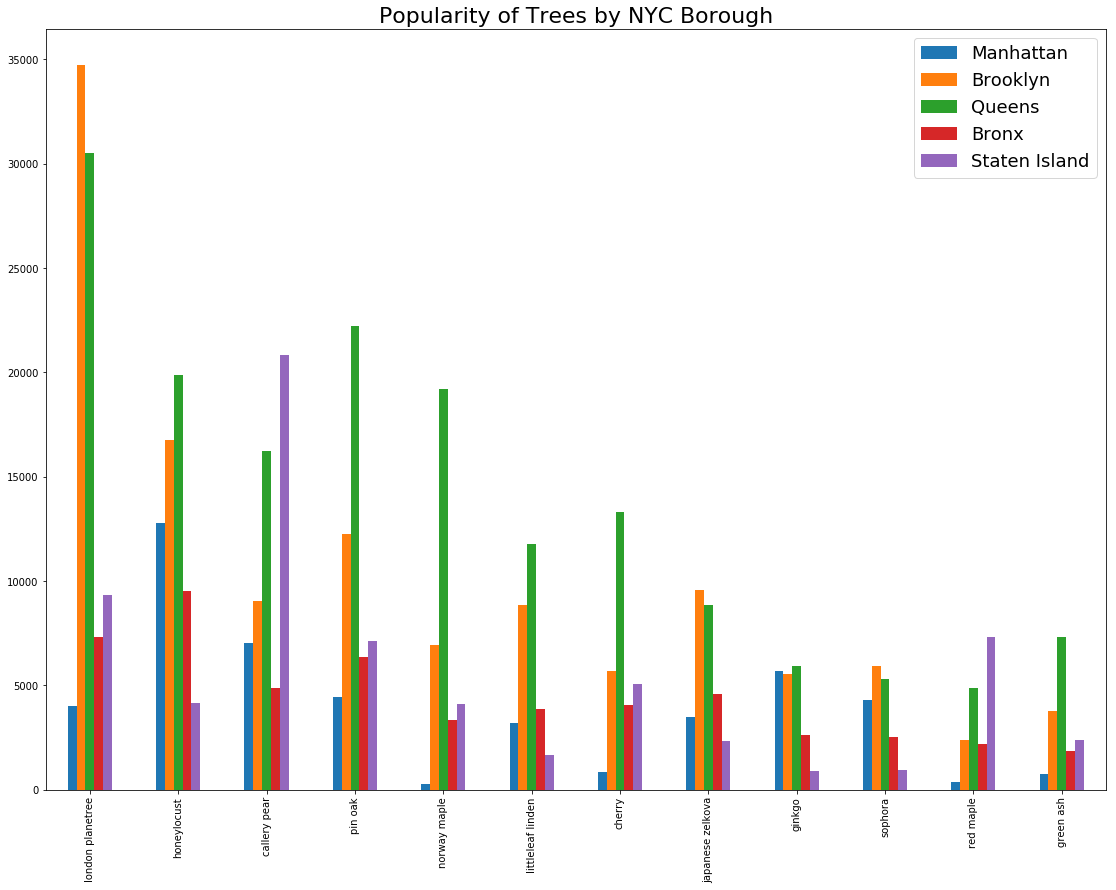

In [11]:
countframe = pd.DataFrame.from_dict(nycdict, orient='index', 
                                    columns = ['NYC', 'Manhattan', 'Brooklyn', 'Queens', 
                                              'Bronx', 'Staten Island'])
boroughframe = countframe.drop('NYC', axis = 1)
boroughframe.head(12).plot(kind = 'bar', figsize = (19, 14))
plt.legend(fontsize = 18)
plt.title('Popularity of Trees by NYC Borough', fontsize = 22)
plt.savefig('Tree_Popularity_By_Borough.png')

## Visualizing Proportions of Different Trees in Manhattan

Another way we might want to look at the popularity of different trees is with a pie chart. Let's focus just on the trees in Manhattan, although we could do this with the whole city or another borough. There are 128 different types of trees listed as in Manhattan in our data, and we don't necessarily want a pie with 128 slices.

In [12]:
df[df['borocode'] == 1]['spc_common'].nunique()

128

So to focus more on the most popular trees, we'll take every tree that occurs fewer than 600 times and add them to an 'other' key.

In [13]:
manhattandict['other'] = 0
for tree in manhattandict:
    if manhattandict[tree] < 600:
        manhattandict['other'] += manhattandict[tree]
        manhattandict[tree] = 'delete'
for k,v in list(manhattandict.items()):
    if v == 'delete':
        del manhattandict[k]

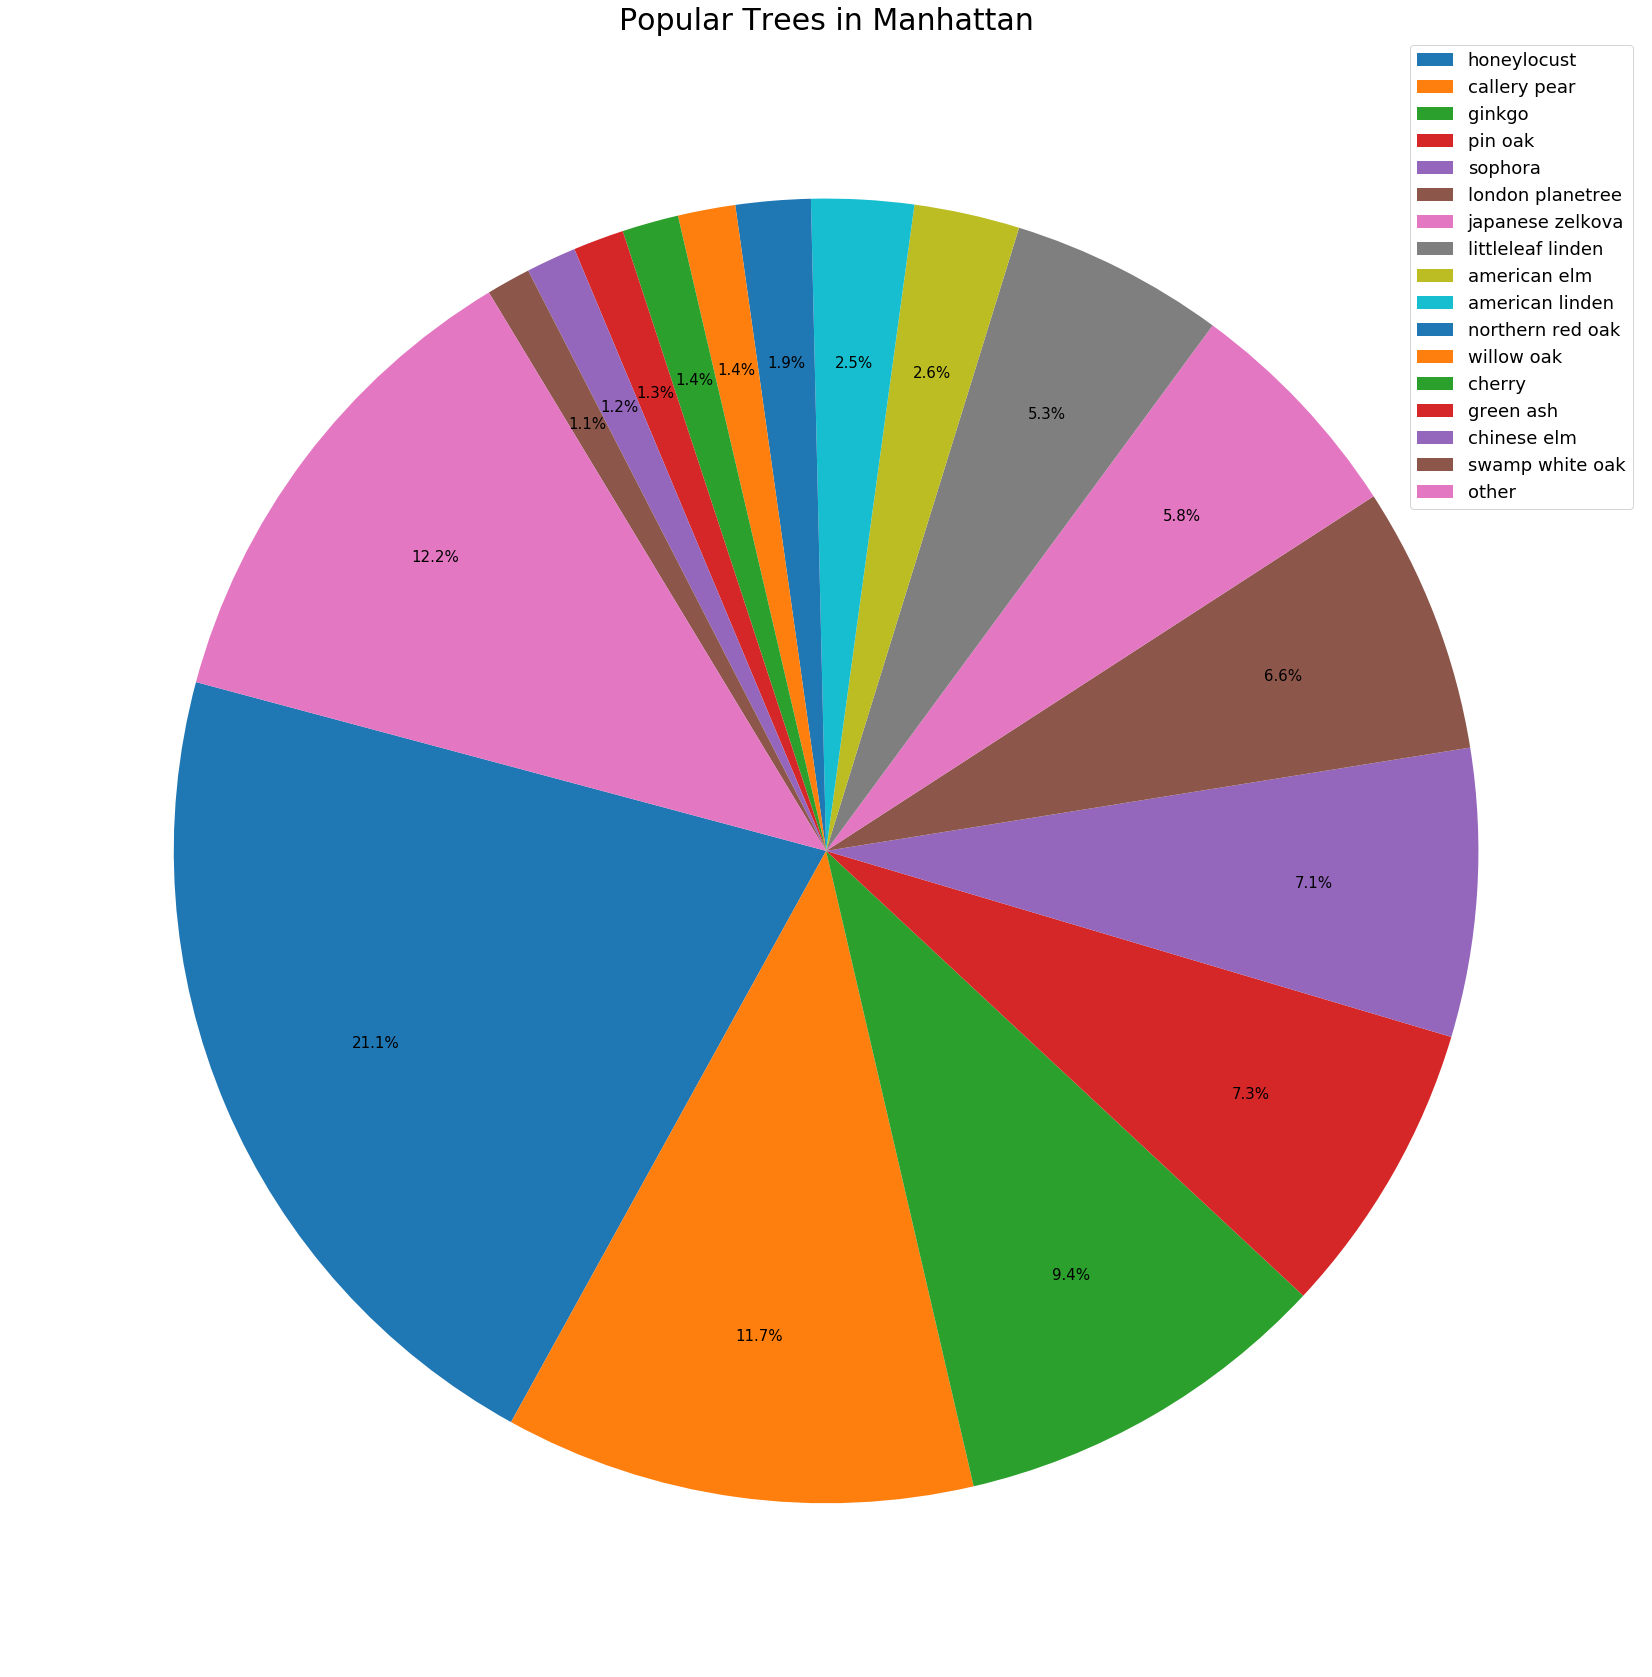

In [14]:
plt.pie(manhattandict.values(), pctdistance = 0.75, autopct="%1.1f%%", startangle = 165, textprops={'fontsize': 15})
plt.title('Popular Trees in Manhattan', fontsize = 30)
plt.legend(manhattandict.keys(), fontsize = 18)
plt.savefig('Manhattan_Popular_Trees_Pie.png')
plt.show()

As the pie chart illustrates, roughly half of the trees in Manhattan are a combination of honeylocusts, callery pears, ginkgos and pin oaks.

## Plotting Trees by Latitude and Longitude

Alright, now that we've gleaned some initial insights from our data, let's try something a little more fun. Each tree in our dataset includes latitude and longitude coordinates. We can use these to make a scatter plot that effectively maps New York City for us. 

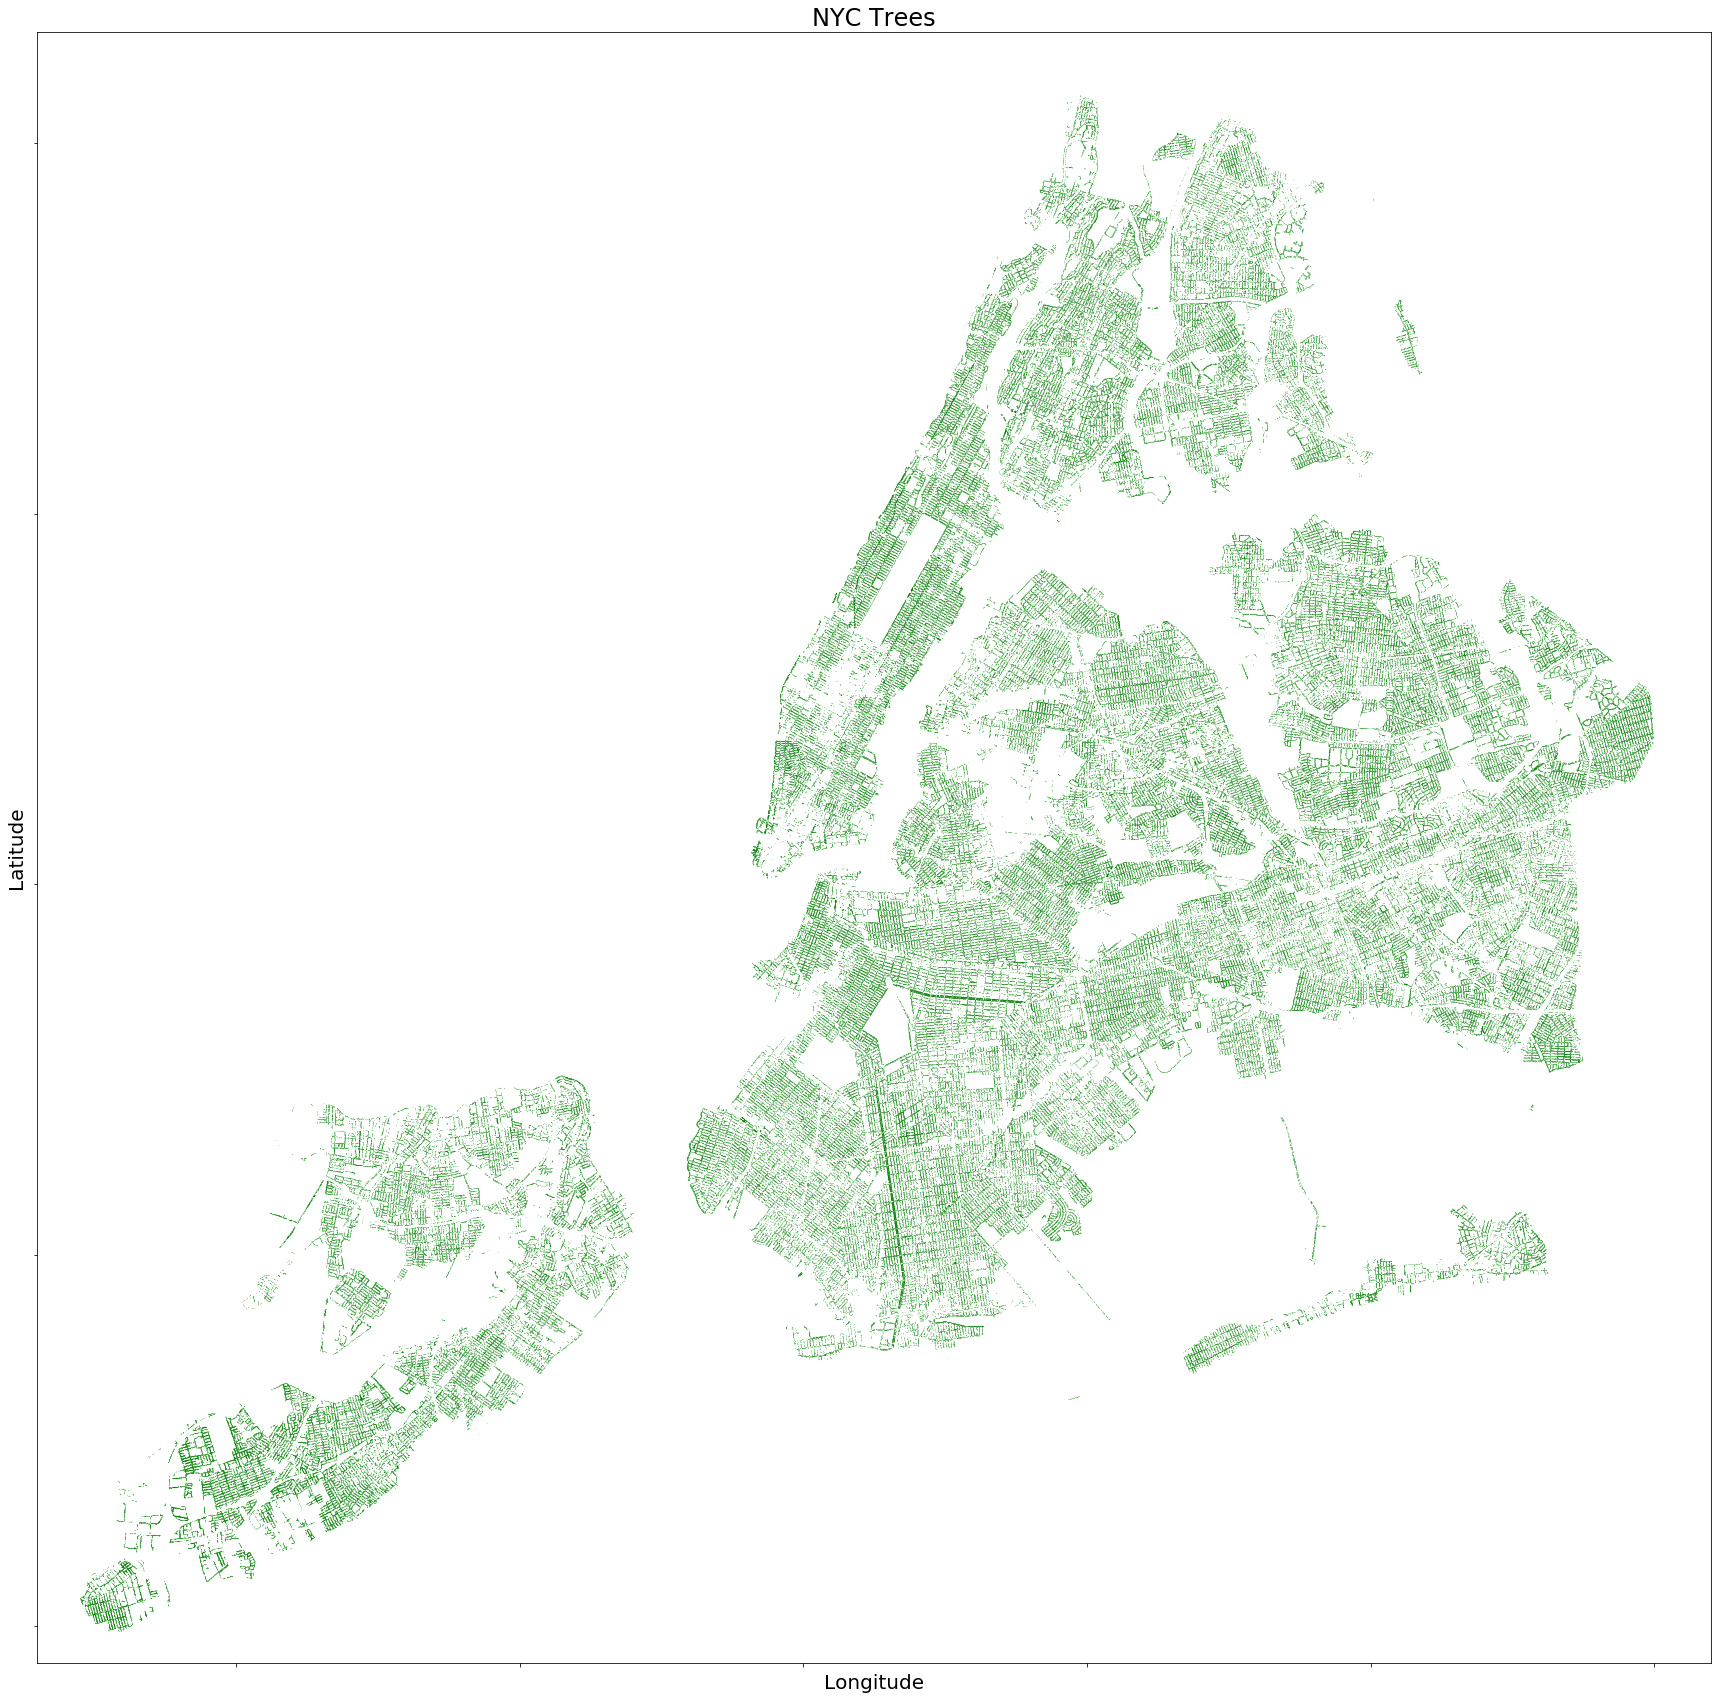

In [15]:
plt.plot(df['longitude'],df['latitude'],'.', markersize = 0.15, color = 'green')
plt.xlabel("Longitude", fontsize = 20)
locs, labs = plt.xticks()
plt.xticks(locs[1:-1], ['']*len(locs[1:-1]))
lycs, lybs = plt.yticks()
plt.yticks(lycs[1:-1], ['']*len(lycs[1:-1]))
plt.xlim(-74.27, -73.68)
plt.ylim(40.49, 40.93)
plt.ylabel('Latitude', fontsize = 20)
plt.title("NYC Trees", fontsize = 24)
plt.savefig('tree_map.png')
plt.show()

Not too shabby! While perhaps the primary feature of this plot is that it's cool to look at, there are also some conclusions we can draw. For instance, we can easily see from the white rectangle in the middle of Manhattan that the hundreds of trees in Central Park are not included in our dataset. The same goes for Propspect Park in Brooklyn.

## Conclusion

As is typically the case, we've only scratched the surface of the information in this dataset. If we wanted to, we could dig into the varying tree diameters or we could dive even deeper into each tree's frequency by location, potentially using the zip code instead of the borough.

However, we've done enough to have a basic understanding of our dataset, and we have a solid foundation to build upon if we want to dive deeper in the future. I hope this notebook has been an entertaining and instructive read, and please feel free to reach out to me with any questions.